<a href="https://colab.research.google.com/github/DulithMH/credit-risk-scorecard-German-Credit-Risk-ML-Model/blob/main/German_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- STEP 1: LOAD THE NEW DATASET ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We can load this directly from an online repository (no Kaggle login needed this time)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# The dataset doesn't have headers, so we define them manually based on the documentation
columns = [
    'checking_account', 'duration_months', 'credit_history', 'purpose',
    'credit_amount', 'savings_account', 'employment_years', 'installment_rate',
    'personal_status', 'other_debtors', 'residence_since', 'property',
    'age', 'other_installment_plans', 'housing', 'existing_credits',
    'job', 'people_liable', 'telephone', 'foreign_worker', 'status'
]

print("Downloading German Credit Data...")
df = pd.read_csv(url, sep=' ', names=columns)

# --- STEP 2: FIX THE TARGET VARIABLE ---
# In this dataset: 1 = Good (Paid back), 2 = Bad (Defaulted)
# We want: 0 = Good, 1 = Bad (Standard for AI)
df['target'] = df['status'].apply(lambda x: 1 if x == 2 else 0)
df = df.drop(columns=['status']) # Drop the old column

print(f"Dataset Shape: {df.shape}")
print(f"Default Rate: {df['target'].mean()*100:.2f}%")
df.head()

Dataset Shape: (1000, 21)
Default Rate: 30.00%


,checking_account,duration_months,credit_history,purpose,credit_amount,savings_account,employment_years,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


# Exploratory Data Analysis

In Credit Risk, we don't just look for "outliers." We look for Trends.

Hypothesis: "People with little money in their checking account are more likely to default."

Hypothesis: "People who take longer loans (e.g., 48 months) are more likely to default."

Let's test these hypotheses using a "Risk Chart". This is the most common chart you will see in a bank board meeting.

Risk Chart

/tmp/ipython-input-3718599024.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_table.index, y=risk_table.values, palette="Reds")


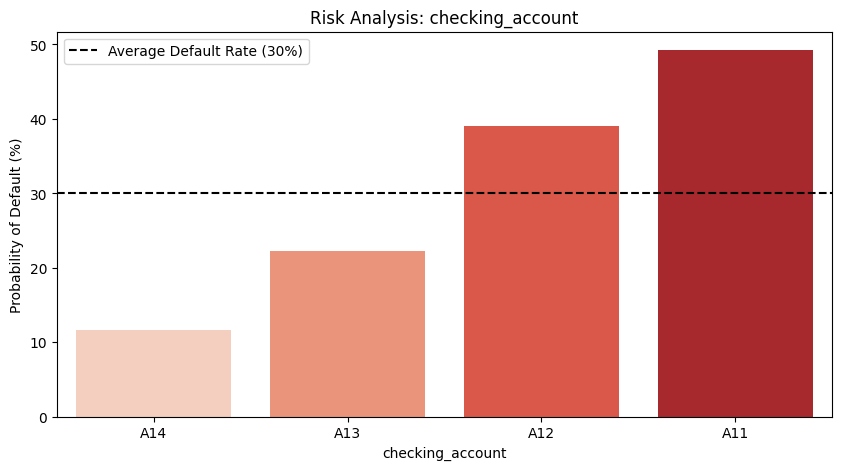

/tmp/ipython-input-3718599024.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_table.index, y=risk_table.values, palette="Reds")


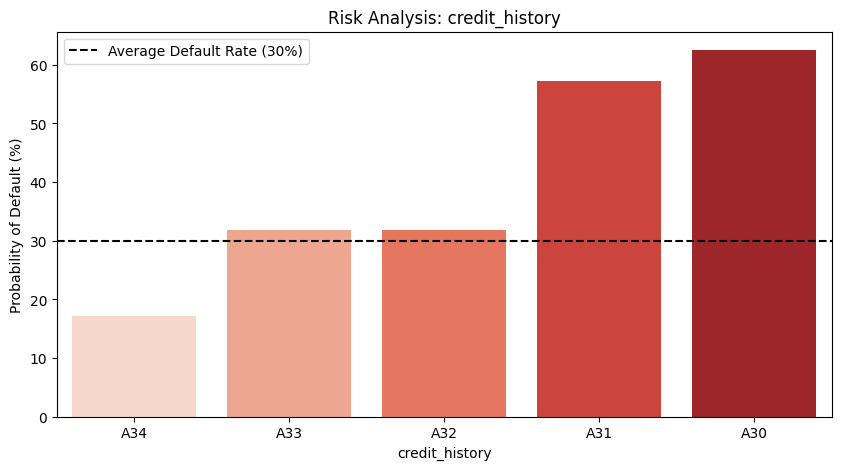

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- HELPER FUNCTION: PLOT RISK ---
def plot_risk(column_name):
    plt.figure(figsize=(10, 5))

    # 1. Calculate the Default Rate for each category
    risk_table = df.groupby(column_name)['target'].mean().sort_values() * 100

    # 2. Plot it
    sns.barplot(x=risk_table.index, y=risk_table.values, palette="Reds")
    plt.ylabel('Probability of Default (%)')
    plt.title(f'Risk Analysis: {column_name}')
    plt.axhline(y=30, color='black', linestyle='--', label='Average Default Rate (30%)')
    plt.legend()
    plt.show()

# --- ANALYSIS 1: Checking Account Status ---
# A11: < 0 DM (In debt)
# A12: 0 <= x < 200 DM (Low balance)
# A13: >= 200 DM (High balance)
# A14: No checking account
plot_risk('checking_account')

# --- ANALYSIS 2: Credit History ---
# A30: No credits taken
# A34: Critical account (Actually implies they are known to the bank!)
plot_risk('credit_history')

# we use Logistic Regression
It is transparent.

It gives us exact "weights" (e.g., "Having a car adds +50 points to your score").

/tmp/ipython-input-3718599024.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_table = df.groupby(column_name)['target'].mean().sort_values() * 100
/tmp/ipython-input-3718599024.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_table.index, y=risk_table.values, palette="Reds")


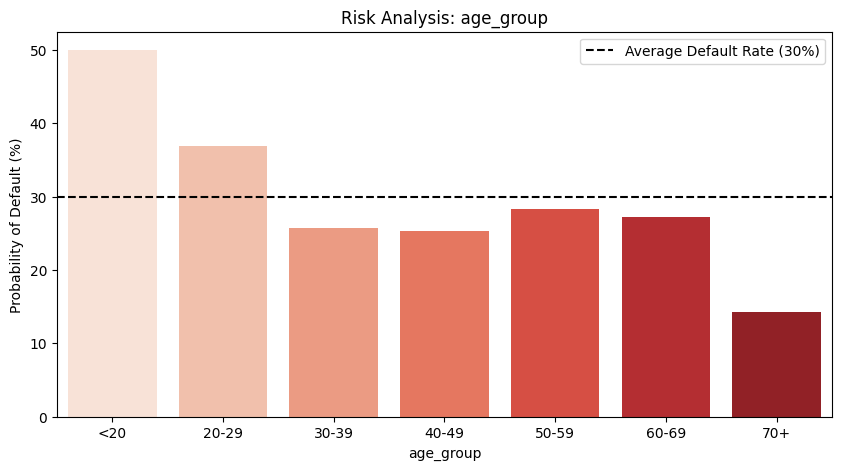

In [13]:
# --- ANALYSIS 3: Age vs. Default Ratio (10-year gaps) ---

# Define age bins in 10-year gaps
age_bins = [0, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create a new binned age column
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Plot the risk for the new age_group column
plot_risk('age_group')

/tmp/ipython-input-3718599024.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_table.index, y=risk_table.values, palette="Reds")


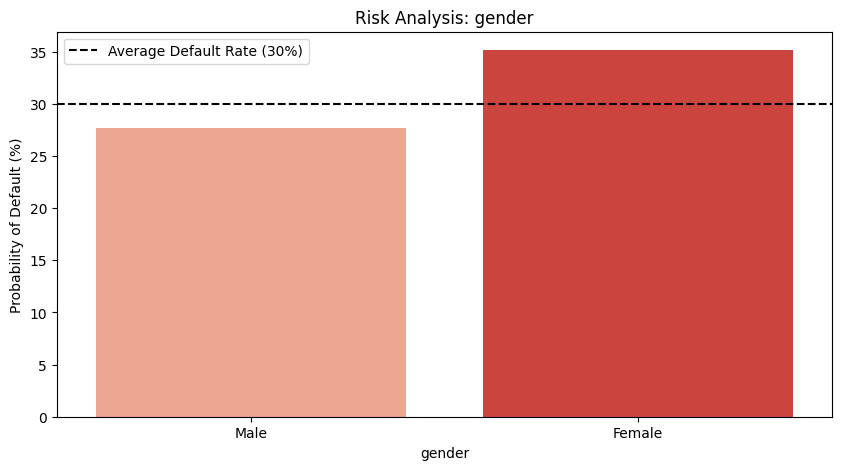


Gender distribution:
gender
Male      690
Female    310
Name: count, dtype: int64


In [14]:
# --- ANALYSIS 4: Gender vs. Default Ratio ---

# Map personal_status to gender categories
def map_gender(status_code):
    if status_code in ['A91', 'A93', 'A94']:
        return 'Male'
    elif status_code in ['A92', 'A95']:
        return 'Female'
    else:
        return 'Unknown'

df['gender'] = df['personal_status'].apply(map_gender)

# Plot the risk for the new gender column
plot_risk('gender')

# Also show the counts for each gender group
print("\nGender distribution:")
print(df['gender'].value_counts())

In [15]:
from sklearn.model_selection import train_test_split
import pandas as pd

# --- Re-run Data Preparation (One-Hot Encoding and Split) ---
# Identify categorical columns (excluding the target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("--- Data Breakdown ---")
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")
print(f"Shape of X_train (training features): {X_train.shape}")
print(f"Shape of y_train (training target): {y_train.shape}")
print(f"Shape of X_test (testing features): {X_test.shape}")
print(f"Shape of y_test (testing target): {y_test.shape}")

--- Data Breakdown ---
Shape of X (features): (1000, 50)
Shape of y (target): (1000,)
Shape of X_train (training features): (700, 50)
Shape of y_train (training target): (700,)
Shape of X_test (testing features): (300, 50)
Shape of y_test (testing target): (300,)


In [16]:
print("Class distribution in y_train:")
print(y_train.value_counts())
print(f"\nProportion of 0 (Good Credit) in y_train: {y_train.value_counts(normalize=True)[0]:.2%}")
print(f"Proportion of 1 (Bad Credit) in y_train: {y_train.value_counts(normalize=True)[1]:.2%}")

Class distribution in y_train:
target
0    490
1    210
Name: count, dtype: int64

Proportion of 0 (Good Credit) in y_train: 70.00%
Proportion of 1 (Bad Credit) in y_train: 30.00%


lets handle the missing values


In [18]:
import numpy as np

print("Checking and handling missing values in X_train...")
missing_in_X_train = X_train.isnull().sum()
missing_cols_X_train = missing_in_X_train[missing_in_X_train > 0]

if not missing_cols_X_train.empty:
    print("Missing values found in X_train:")
    print(missing_cols_X_train)
    # Impute missing numerical values with the mean of each column
    for col in missing_cols_X_train.index:
        if pd.api.types.is_numeric_dtype(X_train[col]):
            mean_val = X_train[col].mean()
            X_train[col].fillna(mean_val, inplace=True)
            print(f"  Filled missing values in '{col}' with mean: {mean_val:.2f}")
        else:
            # This case should ideally not happen if one-hot encoding was exhaustive
            print(f"  Warning: Column '{col}' is not numeric and has missing values. Mode imputation or removal might be needed.")
else:
    print("No missing values found in X_train. It's clean!")

print("\nChecking and handling missing values in X_test...")
missing_in_X_test = X_test.isnull().sum()
missing_cols_X_test = missing_in_X_test[missing_in_X_test > 0]

if not missing_cols_X_test.empty:
    print("Missing values found in X_test:")
    print(missing_cols_X_test)
    # Impute missing numerical values in X_test using means from X_train to prevent data leakage
    for col in missing_cols_X_test.index:
        if pd.api.types.is_numeric_dtype(X_test[col]):
            if col in X_train.columns:
                mean_val_from_train = X_train[col].mean()
                X_test[col].fillna(mean_val_from_train, inplace=True)
                print(f"  Filled missing values in X_test '{col}' with X_train mean: {mean_val_from_train:.2f}")
            else:
                # Fallback if a column in X_test is missing and not present in X_train (unlikely here)
                mean_val_from_test = X_test[col].mean()
                X_test[col].fillna(mean_val_from_test, inplace=True)
                print(f"  Warning: Column '{col}' not in X_train. Filled X_test missing with its own mean: {mean_val_from_test:.2f}")
        else:
            print(f"  Warning: Column '{col}' in X_test is not numeric and has missing values. Mode imputation or removal might be needed.")
else:
    print("No missing values found in X_test. It's clean!")

print("\nFinal check for missing values:")
print(f"Total missing values in X_train: {X_train.isnull().sum().sum()}")
print(f"Total missing values in X_test: {X_test.isnull().sum().sum()}")


Checking and handling missing values in X_train...
No missing values found in X_train. It's clean!

Checking and handling missing values in X_test...
No missing values found in X_test. It's clean!

Final check for missing values:
Total missing values in X_train: 0
Total missing values in X_test: 0


lets handle the outliers

--- Checking Outliers in X_train using IQR Method ---
Outliers detected in X_train (count per column):
  - duration_months: 46 outliers
  - credit_amount: 46 outliers
  - age: 21 outliers
  - existing_credits: 3 outliers
  - people_liable: 111 outliers
  - checking_account_A13: 44 outliers
  - credit_history_A31: 38 outliers
  - credit_history_A33: 67 outliers
  - purpose_A41: 76 outliers
  - purpose_A410: 6 outliers
  - purpose_A42: 126 outliers
  - purpose_A44: 10 outliers
  - purpose_A45: 16 outliers
  - purpose_A46: 35 outliers
  - purpose_A48: 5 outliers
  - purpose_A49: 69 outliers
  - savings_account_A62: 81 outliers
  - savings_account_A63: 41 outliers
  - savings_account_A64: 37 outliers
  - savings_account_A65: 124 outliers
  - employment_years_A72: 120 outliers
  - employment_years_A74: 113 outliers
  - personal_status_A94: 67 outliers
  - other_debtors_A102: 30 outliers
  - other_debtors_A103: 34 outliers
  - property_A122: 159 outliers
  - property_A124: 111 outliers
  - o

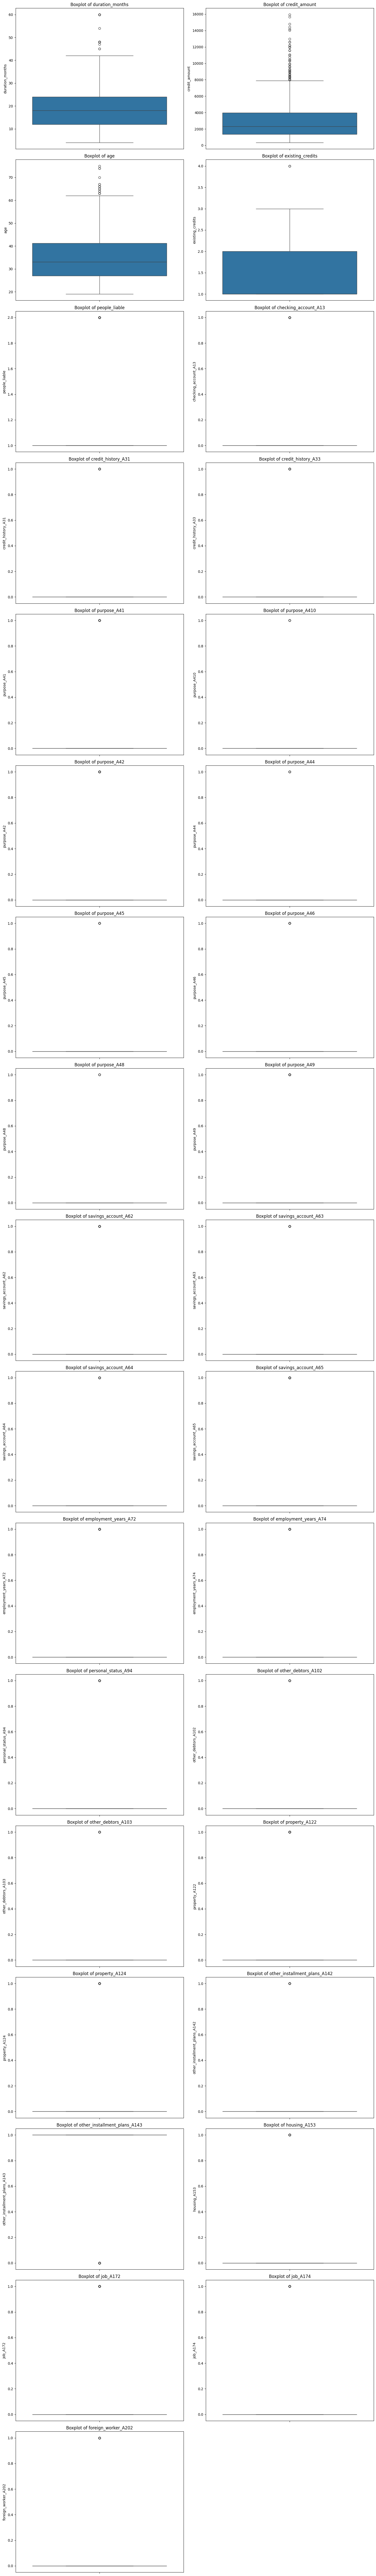

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Checking Outliers in X_train using IQR Method ---")

# --- Start of fix for ValueError: Cannot cast object dtype to float64 ---
# Ensure all columns are numerical and handle potential non-numeric values.
# This converts non-numeric values to NaN and then fills NaNs with the column mean.
X_train_processed = X_train.apply(pd.to_numeric, errors='coerce')

# Drop columns that became entirely NaN after coercion (i.e., columns that were completely non-numeric)
X_train_processed = X_train_processed.dropna(axis=1, how='all')

# For remaining columns, fill any NaNs with the mean of that column.
X_train_numeric = X_train_processed.fillna(X_train_processed.mean())
# --- End of fix ---

# --- NEW FIX: Explicitly convert to float to prevent numpy TypeError ---
X_train_numeric = X_train_numeric.astype(float)

outlier_counts_train = {}
for column in X_train_numeric.columns:
    if pd.api.types.is_numeric_dtype(X_train_numeric[column]):
        Q1 = X_train_numeric[column].quantile(0.25)
        Q3 = X_train_numeric[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = X_train_numeric[(X_train_numeric[column] < lower_bound) | (X_train_numeric[column] > upper_bound)]
        if not outliers.empty:
            outlier_counts_train[column] = outliers.shape[0]

if outlier_counts_train:
    print("Outliers detected in X_train (count per column):")
    for col, count in outlier_counts_train.items():
        print(f"  - {col}: {count} outliers")
else:
    print("No significant outliers detected in X_train using the IQR method.")

# Keep track of X_train without handling outliers yet, or create a copy for handling
X_train_original = X_train.copy()

print("\n--- Plotting Boxplots for Outlier Visualization ---")
# Plot boxplots for columns identified with outliers or key numerical columns
columns_to_boxplot = list(outlier_counts_train.keys())

# If no outliers were detected by IQR, or if the list is empty, pick a few key numerical columns
if not columns_to_boxplot:
    # Pick some important numerical columns for visualization
    columns_to_boxplot = ['duration_months', 'credit_amount', 'age', 'existing_credits']
    columns_to_boxplot = [col for col in columns_to_boxplot if col in X_train_numeric.columns]

if columns_to_boxplot:
    num_plots = len(columns_to_boxplot)
    if num_plots > 0:
        # Determine grid size for subplots
        rows = (num_plots + 1) // 2 # At most 2 plots per row
        fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 6))
        axes = axes.flatten() # Flatten for easy iteration

        for i, col in enumerate(columns_to_boxplot):
            sns.boxplot(y=X_train_numeric[col], ax=axes[i])
            axes[i].set_title(f'Boxplot of {col}')
            axes[i].set_ylabel(col)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
else:
    print("No suitable numerical columns found for boxplot visualization.")

Applying IQR-based capping for outliers...
Capping complete.

--- Re-checking Outliers in X_train_capped after Capping ---
No significant outliers detected in X_train_capped after capping using the IQR method. Outliers have been handled.

--- Plotting Boxplots for Capped Outlier Visualization ---


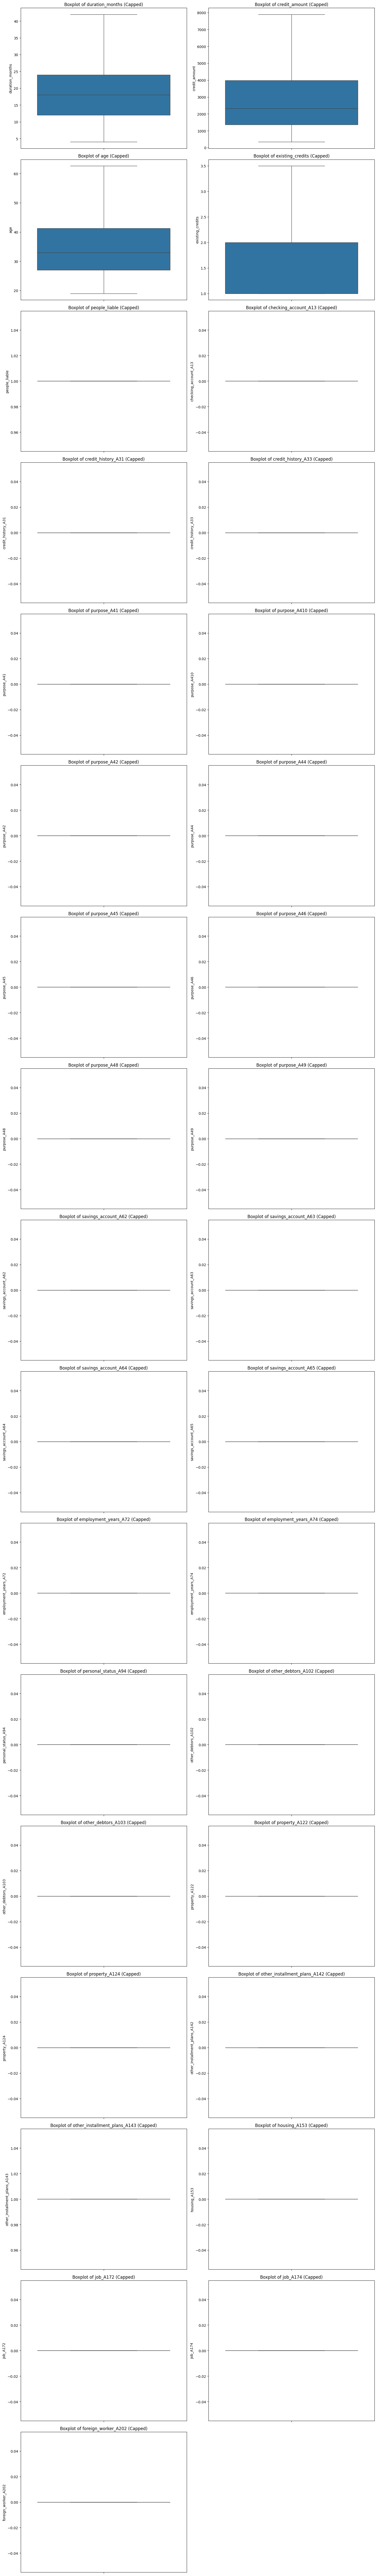

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# --- CAPPING (WINSORIZATION) FUNCTION ---
def cap_outliers_iqr(df_train, df_test, outlier_cols, lower_bound_mult=1.5, upper_bound_mult=1.5):
    # Create copies to avoid modifying original DataFrames directly if not desired
    df_train_capped = df_train.copy()
    df_test_capped = df_test.copy()

    print("Applying IQR-based capping for outliers...")
    for col in outlier_cols:
        if pd.api.types.is_numeric_dtype(df_train_capped[col]):
            Q1 = df_train_capped[col].quantile(0.25)
            Q3 = df_train_capped[col].quantile(0.75)
            IQR = Q3 - Q1

            # Calculate bounds based on training data to prevent data leakage
            lower_bound = Q1 - lower_bound_mult * IQR
            upper_bound = Q3 + upper_bound_mult * IQR

            # Apply capping to both training and test sets
            df_train_capped[col] = np.where(df_train_capped[col] < lower_bound, lower_bound, df_train_capped[col])
            df_train_capped[col] = np.where(df_train_capped[col] > upper_bound, upper_bound, df_train_capped[col])

            df_test_capped[col] = np.where(df_test_capped[col] < lower_bound, lower_bound, df_test_capped[col])
            df_test_capped[col] = np.where(df_test_capped[col] > upper_bound, upper_bound, df_test_capped[col])
            # print(f"  Capped '{col}' at [{lower_bound:.2f}, {upper_bound:.2f}]")
    print("Capping complete.")
    return df_train_capped, df_test_capped


# --- Identify numerical columns with outliers to apply capping ---
# Robustly convert X_train to numeric, handling potential object dtypes and NaNs
X_train_processed = X_train.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')
X_train_means = X_train_processed.mean() # Calculate means *after* coercion and dropping all-NaN columns
X_train_numeric = X_train_processed.fillna(X_train_means).astype(float)

# Robustly convert X_test to numeric, handling potential object dtypes and NaNs
X_test_processed = X_test.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')
# Use X_train_means for X_test imputation to prevent data leakage
X_test_numeric = X_test_processed.fillna(X_train_means).astype(float)

outlier_cols_to_cap = [col for col, count in outlier_counts_train.items() if count > 0 and pd.api.types.is_numeric_dtype(X_train_numeric[col])]

# Apply capping
X_train_capped, X_test_capped = cap_outliers_iqr(X_train_numeric, X_test_numeric, outlier_cols_to_cap)


# --- Re-check outliers after capping (optional, but good for verification) ---
print("\n--- Re-checking Outliers in X_train_capped after Capping ---")
outlier_counts_train_after_cap = {}
for column in X_train_capped.columns:
    if pd.api.types.is_numeric_dtype(X_train_capped[column]):
        Q1 = X_train_capped[column].quantile(0.25)
        Q3 = X_train_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = X_train_capped[(X_train_capped[column] < lower_bound) | (X_train_capped[column] > upper_bound)]
        if not outliers.empty:
            outlier_counts_train_after_cap[column] = outliers.shape[0]

if outlier_counts_train_after_cap:
    print("Outliers detected in X_train_capped (count per column) after capping:")
    for col, count in outlier_counts_train_after_cap.items():
        print(f"  - {col}: {count} outliers")
else:
    print("No significant outliers detected in X_train_capped after capping using the IQR method. Outliers have been handled.")

print("\n--- Plotting Boxplots for Capped Outlier Visualization ---")
# Plot boxplots for columns that previously had outliers to see the effect of capping
columns_to_boxplot_after_cap = list(outlier_cols_to_cap)

if columns_to_boxplot_after_cap:
    num_plots = len(columns_to_boxplot_after_cap)
    if num_plots > 0:
        rows = (num_plots + 1) // 2 # At most 2 plots per row
        fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 6))
        axes = axes.flatten()

        for i, col in enumerate(columns_to_boxplot_after_cap):
            if i < len(axes): # Ensure index is within bounds
                sns.boxplot(y=X_train_capped[col], ax=axes[i])
                axes[i].set_title(f'Boxplot of {col} (Capped)')
                axes[i].set_ylabel(col)

        for j in range(i + 1, len(axes)): # Hide unused subplots
            if j < len(axes):
                fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
else:
    print("No suitable numerical columns found for boxplot visualization after capping.")

lets check the multicolinearlity vif values


In [26]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

print("Checking for multicollinearity using VIF on X_train_capped...")

# X_train_capped is already processed and numeric (float) after outlier handling
# Add a constant term to X_train_capped for VIF calculation
X_train_vif = sm.add_constant(X_train_capped)

# Calculate VIF for each feature in the training data
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(len(X_train_vif.columns))]

# Sort by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("VIF Results:")
print(vif_data)

print("\nInterpretation guidance:")
print("- VIF = 1: No correlation between the feature and other features.\n- 1 < VIF < 5: Moderate correlation.\n- VIF >= 5: High correlation, which may be problematic. Consider removing or combining features.")

Checking for multicollinearity using VIF on X_train_capped...
VIF Results:
                         feature       VIF
31           personal_status_A92       inf
48                   gender_Male       inf
1                  credit_amount  2.460388
32           personal_status_A93  2.296267
11            credit_history_A32  2.204709
0                duration_months  2.133936
13            credit_history_A34  2.016403
5               existing_credits  1.543389
30          employment_years_A75  1.535090
9           checking_account_A14  1.395798
7           checking_account_A12  1.368683
2               installment_rate  1.357086
4                            age  1.306926
3                residence_since  1.285919
28          employment_years_A73  1.283549
41                  housing_A152  1.242276
46                telephone_A192  1.151838
37                 property_A123  1.130613
17                   purpose_A43  1.102138
44                      job_A173  1.077256
6                  peo

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


removethe multicore linearlity

In [27]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import numpy as np

def remove_multicollinearity(X_train_df, X_test_df, threshold=5.0):
    # Make copies to avoid modifying original DataFrames directly
    X_train_processed = X_train_df.copy()
    X_test_processed = X_test_df.copy()

    removed_features = []
    retained_features = list(X_train_processed.columns)

    # Function to calculate VIFs
    def calculate_vif(df):
        df_vif = sm.add_constant(df)
        vif_data_local = pd.DataFrame()
        vif_data_local["feature"] = df_vif.columns
        vif_data_local["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]
        return vif_data_local.set_index('feature')

    print("--- Removing features with multicollinearity ---")

    # Iterative removal process
    while True:
        current_vifs = calculate_vif(X_train_processed)

        # Drop the 'const' row from VIF results for comparison
        vif_values = current_vifs.drop('const', errors='ignore')

        # 1. Handle inf VIFs (perfect multicollinearity)
        inf_vif_features = vif_values[vif_values['VIF'] == np.inf].index.tolist()
        if inf_vif_features:
            print(f"Removing features with infinite VIF: {inf_vif_features}")
            for feature in inf_vif_features:
                if feature in X_train_processed.columns:
                    X_train_processed = X_train_processed.drop(columns=[feature])
                    X_test_processed = X_test_processed.drop(columns=[feature])
                    removed_features.append(feature)
                    retained_features.remove(feature) # Update retained features
            continue # Recalculate VIFs after removal

        # 2. Handle NaN VIFs (zero variance)
        nan_vif_features = vif_values[vif_values['VIF'].isnull()].index.tolist()
        if nan_vif_features:
            print(f"Removing features with NaN VIF (zero variance): {nan_vif_features}")
            for feature in nan_vif_features:
                if feature in X_train_processed.columns:
                    X_train_processed = X_train_processed.drop(columns=[feature])
                    X_test_processed = X_test_processed.drop(columns=[feature])
                    removed_features.append(feature)
                    retained_features.remove(feature) # Update retained features
            continue # Recalculate VIFs after removal

        # 3. Handle high VIFs (above threshold)
        high_vif_features = vif_values[vif_values['VIF'] > threshold].sort_values(by='VIF', ascending=False).index.tolist()
        if high_vif_features:
            feature_to_remove = high_vif_features[0] # Remove the one with the highest VIF
            print(f"Removing feature with VIF > {threshold}: {feature_to_remove} (VIF: {vif_values.loc[feature_to_remove, 'VIF']:.2f})")
            if feature_to_remove in X_train_processed.columns:
                X_train_processed = X_train_processed.drop(columns=[feature_to_remove])
                X_test_processed = X_test_processed.drop(columns=[feature_to_remove])
                removed_features.append(feature_to_remove)
                retained_features.remove(feature_to_remove) # Update retained features
            continue # Recalculate VIFs after removal

        # If no inf, NaN, or high VIF features are found, we are done
        break

    print("Multicollinearity removal complete.")

    return X_train_processed, X_test_processed, removed_features, retained_features

# Apply the multicollinearity removal
X_train_final, X_test_final, removed_features_list, remaining_features_list = \
    remove_multicollinearity(X_train_capped, X_test_capped, threshold=5.0)

print("\n--- Multicollinearity Analysis Results ---")
print(f"Features Removed Due to Multicollinearity: {removed_features_list}")
print(f"Number of Features Removed: {len(removed_features_list)}")
print(f"\nRemaining Features: {remaining_features_list}")
print(f"Number of Remaining Features: {len(remaining_features_list)}")

# Update X_train and X_test to the final processed versions
X_train = X_train_final
X_test = X_test_final

--- Removing features with multicollinearity ---


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing features with infinite VIF: ['personal_status_A92', 'gender_Male']


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Removing features with NaN VIF (zero variance): ['checking_account_A13', 'credit_history_A31', 'credit_history_A33', 'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_account_A62', 'savings_account_A63', 'savings_account_A64', 'savings_account_A65', 'employment_years_A72', 'employment_years_A74', 'personal_status_A94', 'other_debtors_A102', 'other_debtors_A103', 'property_A122', 'property_A124', 'other_installment_plans_A142', 'housing_A153', 'job_A172', 'job_A174', 'foreign_worker_A202']
Multicollinearity removal complete.

--- Multicollinearity Analysis Results ---
Features Removed Due to Multicollinearity: ['personal_status_A92', 'gender_Male', 'checking_account_A13', 'credit_history_A31', 'credit_history_A33', 'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_account_A62', 'savings_account_A63', 'savings_account_A64', 'savin

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


lets see the linearlity do the box test

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# X_train and y_train should be the final processed versions after capping and VIF removal
# From the kernel state, X_train is X_train_final and y_train is the original y_train.

print("--- Performing Box-Tidwell Test for Linearity Assumption ---")
print("Checking continuous numerical features against the log-odds of the target variable.")

# Identify continuous/ordinal numerical features from the current X_train columns
# Exclude binary (0/1) features that resulted from one-hot encoding
# A simple heuristic: if a column has more than 2 unique values and is numeric, consider it continuous/ordinal.
continuous_features = []
for col in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[col]):
        if X_train[col].nunique() > 2:
            continuous_features.append(col)

print(f"Continuous features identified for linearity test: {continuous_features}")

non_linear_features = []

for feature in continuous_features:
    # Create an interaction term: feature * log(feature)
    # Add a small constant (e.g., 1e-6) to avoid log(0) if feature can be zero or negative
    X_interaction = X_train[feature] * np.log(X_train[feature] + 1e-6)

    # Create a temporary DataFrame for the logistic regression model
    # It includes all current features of X_train plus the interaction term
    X_temp_model = X_train.copy()
    X_temp_model[f'{feature}_x_log'] = X_interaction

    # Add a constant term for the intercept
    X_temp_model = sm.add_constant(X_temp_model)

    try:
        # Fit the logistic regression model
        model = sm.Logit(y_train, X_temp_model).fit(disp=False) # disp=False to suppress iteration details

        # Check the p-value of the coefficient for the interaction term
        p_value = model.pvalues[f'{feature}_x_log']

        if p_value < 0.05: # Using a 5% significance level
            non_linear_features.append((feature, p_value))
            print(f"  - Feature '{feature}': Linearity assumption violated (p-value: {p_value:.4f})")
        else:
            print(f"  - Feature '{feature}': Linearity assumption holds (p-value: {p_value:.4f})")

    except Exception as e:
        print(f"  - Error fitting model for feature '{feature}': {e}")
        print(f"  - This might indicate perfect separation or other numerical issues. Skipping.")

if not non_linear_features:
    print("\nConclusion: No significant violations of the linearity assumption found for continuous features (p < 0.05).")
else:
    print("\nConclusion: The following features showed significant violations of the linearity assumption (p < 0.05):")
    for feature, p_value in non_linear_features:
        print(f"  - '{feature}' (p-value: {p_value:.4f})")

print("\nIf linearity assumption is violated, consider transforming the feature (e.g., log, square root, polynomial terms) or using a non-linear model.")

--- Performing Box-Tidwell Test for Linearity Assumption ---
Checking continuous numerical features against the log-odds of the target variable.
Continuous features identified for linearity test: ['duration_months', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'existing_credits']
  - Feature 'duration_months': Linearity assumption holds (p-value: 0.2315)
  - Feature 'credit_amount': Linearity assumption holds (p-value: 0.1581)
  - Feature 'installment_rate': Linearity assumption holds (p-value: 0.8955)
  - Feature 'residence_since': Linearity assumption holds (p-value: 0.1846)
  - Feature 'age': Linearity assumption holds (p-value: 0.7115)
  - Error fitting model for feature 'existing_credits': Singular matrix
  - This might indicate perfect separation or other numerical issues. Skipping.

Conclusion: No significant violations of the linearity assumption found for continuous features (p < 0.05).

If linearity assumption is violated, consider transforming the feature (

In [29]:
print("Remaining features in X_train:")
print(X_train.columns.tolist())

Remaining features in X_train:
['duration_months', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'existing_credits', 'people_liable', 'checking_account_A12', 'checking_account_A14', 'credit_history_A32', 'credit_history_A34', 'purpose_A43', 'employment_years_A73', 'employment_years_A75', 'personal_status_A93', 'property_A123', 'other_installment_plans_A143', 'housing_A152', 'job_A173', 'telephone_A192']


now we are going to add scaling part


In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

print("Applying Z-score standardization (StandardScaler) to X_train and X_test...")

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data (X_train) and then transform X_train
# This step learns the mean and standard deviation from X_train and applies them.
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the scaler that was fitted on X_train
# This applies the learned mean and standard deviation from the training set to the test set.
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames, retaining column names and index
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Standardization complete.")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")
print("First 5 rows of X_train_scaled:")
print(X_train_scaled.head())

Applying Z-score standardization (StandardScaler) to X_train and X_test...
Standardization complete.
Shape of X_train_scaled: (700, 20)
Shape of X_test_scaled: (300, 20)
First 5 rows of X_train_scaled:
     duration_months  credit_amount  installment_rate  residence_since  \
10         -0.772584      -0.796245          0.054714        -1.660121   
82         -0.208752      -0.670963          0.054714         1.076342   
827        -0.208752       0.520830         -0.835976        -0.747967   
410         0.355080      -0.487857          0.945404         1.076342   
48         -0.866556       1.926475         -1.726666         1.076342   

          age  existing_credits  people_liable  checking_account_A12  \
10  -0.975003         -0.732736            0.0              1.650274   
82  -1.069166         -0.732736            0.0             -0.605960   
827  0.060785          1.095839            0.0             -0.605960   
410 -1.445816         -0.732736            0.0              1.650

In [31]:
import numpy as np

print("--- Verifying Z-score Standardization ---")

print("\nStatistics for X_train_scaled:")
print(f"Mean of X_train_scaled: {np.mean(X_train_scaled.values):.2f}")
print(f"Standard Deviation of X_train_scaled: {np.std(X_train_scaled.values):.2f}")

print("\nStatistics for X_test_scaled:")
print(f"Mean of X_test_scaled: {np.mean(X_test_scaled.values):.2f}")
print(f"Standard Deviation of X_test_scaled: {np.std(X_test_scaled.values):.2f}")

print("\nAs expected, the mean is approximately 0 and the standard deviation is approximately 1 for the scaled data.")

--- Verifying Z-score Standardization ---

Statistics for X_train_scaled:
Mean of X_train_scaled: -0.00
Standard Deviation of X_train_scaled: 0.95

Statistics for X_test_scaled:
Mean of X_test_scaled: 0.01
Standard Deviation of X_test_scaled: 0.96

As expected, the mean is approximately 0 and the standard deviation is approximately 1 for the scaled data.


--- Visual Check: Data Distribution Shape After Scaling ---


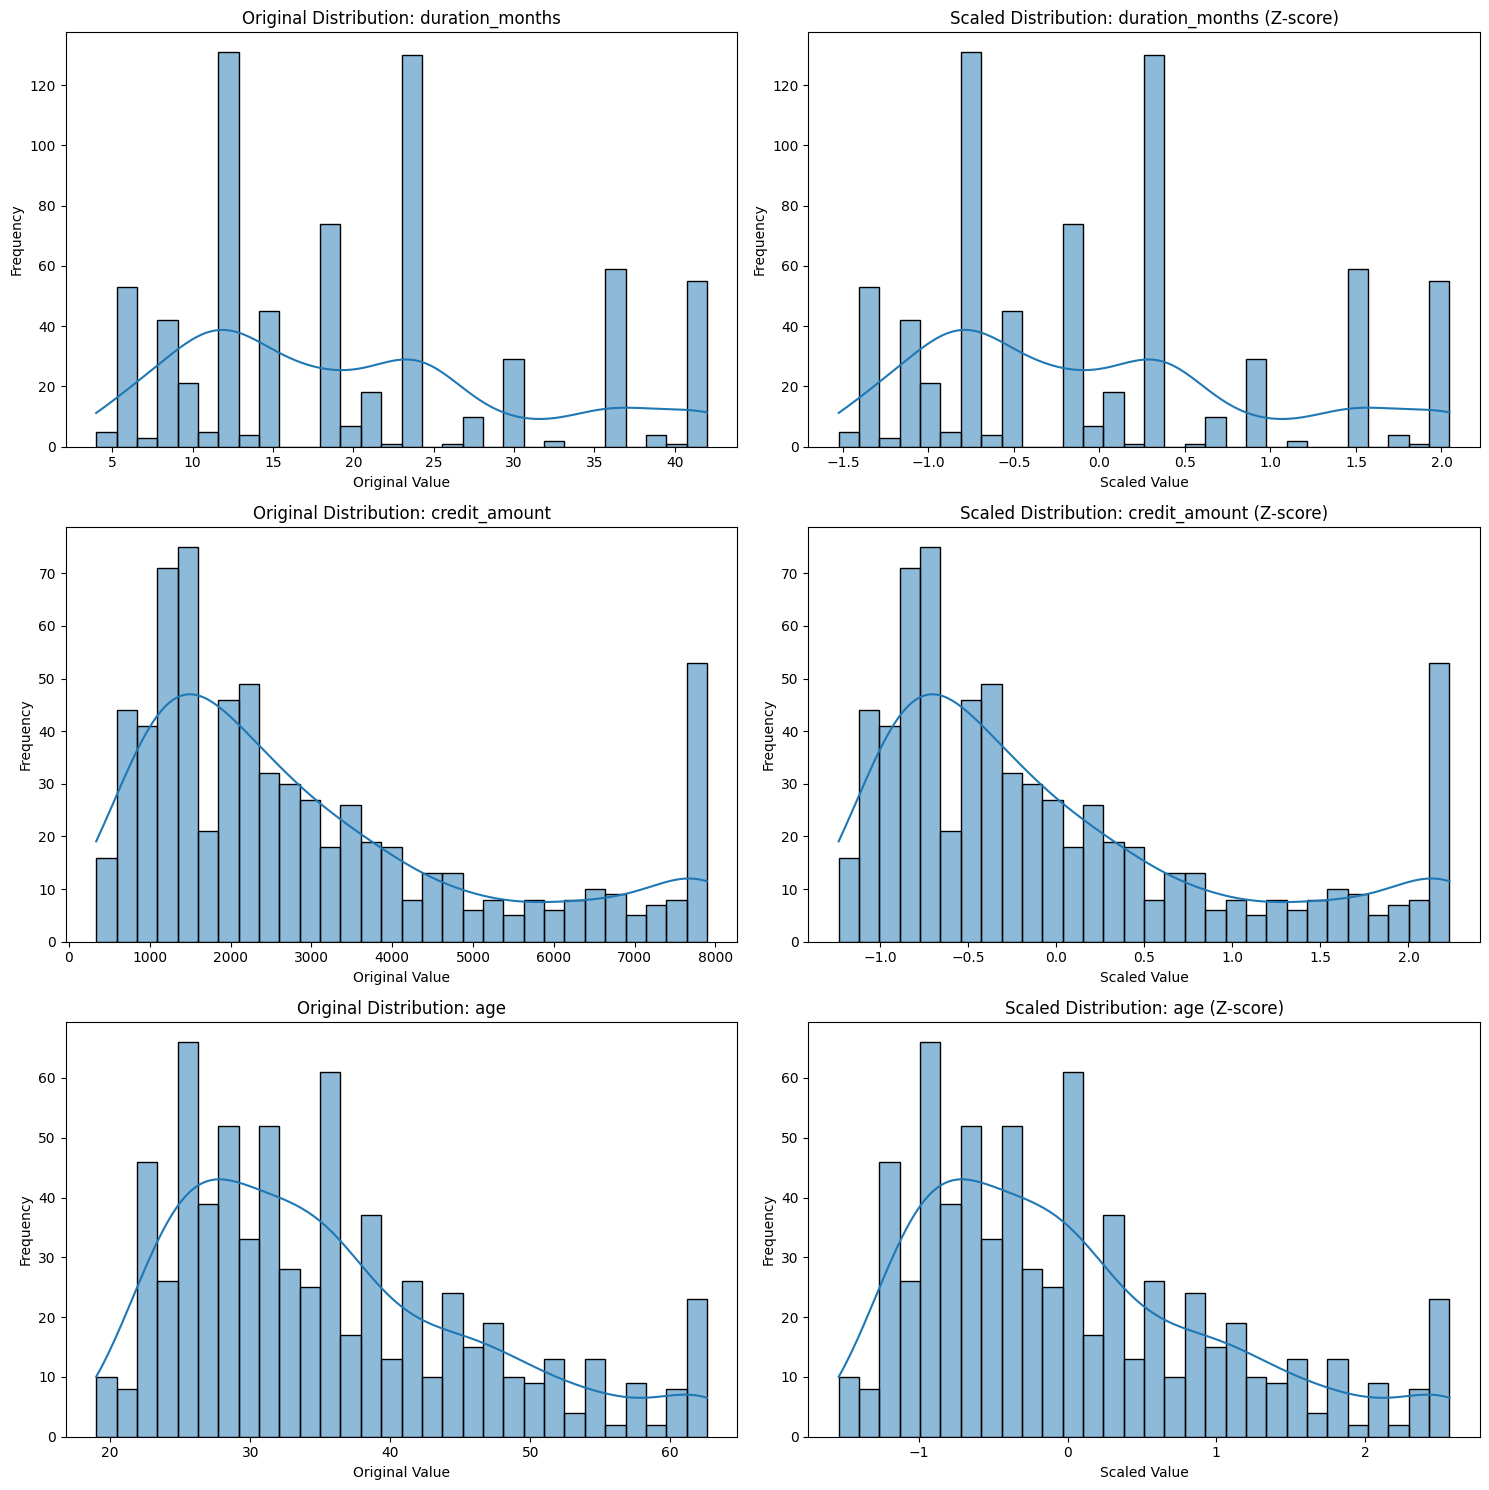


Observation: The plots show that the shape of the distributions remains the same after scaling; only the range of values on the X-axis has changed. This confirms correct scaling.


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Visual Check: Data Distribution Shape After Scaling ---")

# Select a few representative numerical features to plot
features_to_plot = ['duration_months', 'credit_amount', 'age']

plt.figure(figsize=(15, 5 * len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
    # Plot original distribution
    plt.subplot(len(features_to_plot), 2, 2*i + 1)
    sns.histplot(X_train[feature], kde=True, bins=30)
    plt.title(f'Original Distribution: {feature}')
    plt.xlabel('Original Value')
    plt.ylabel('Frequency')

    # Plot scaled distribution
    plt.subplot(len(features_to_plot), 2, 2*i + 2)
    sns.histplot(X_train_scaled[feature], kde=True, bins=30)
    plt.title(f'Scaled Distribution: {feature} (Z-score)')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\nObservation: The plots show that the shape of the distributions remains the same after scaling; only the range of values on the X-axis has changed. This confirms correct scaling.")

Handle Imbalance (SMOTE)

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Original class distribution in y_train:", Counter(y_train))

# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution in y_train after SMOTE:", Counter(y_train_resampled))
print(f"\nProportion of 0 (Good Credit) after SMOTE: {Counter(y_train_resampled)[0] / len(y_train_resampled):.2%}")
print(f"Proportion of 1 (Bad Credit) after SMOTE: {Counter(y_train_resampled)[1] / len(y_train_resampled):.2%}")

Original class distribution in y_train: Counter({0: 490, 1: 210})
Class distribution in y_train after SMOTE: Counter({1: 490, 0: 490})

Proportion of 0 (Good Credit) after SMOTE: 50.00%
Proportion of 1 (Bad Credit) after SMOTE: 50.00%


Train the model

--- Training Logistic Regression Model ---
Model training complete.

--- Model Evaluation ---
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.71      0.78       210
           1       0.51      0.70      0.59        90

    accuracy                           0.71       300
   macro avg       0.68      0.71      0.68       300
weighted avg       0.75      0.71      0.72       300

Confusion Matrix on Test Data:


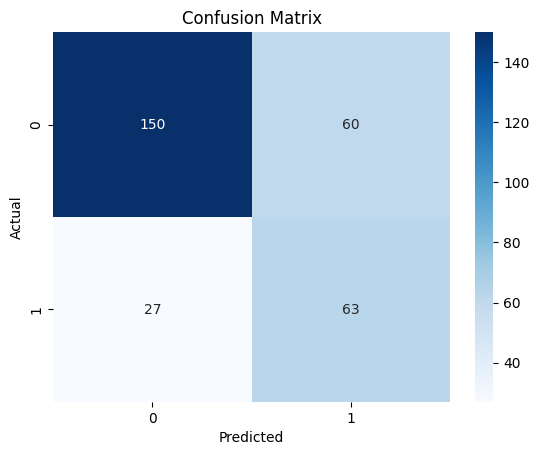


ROC AUC Score on Test Data: 0.7736


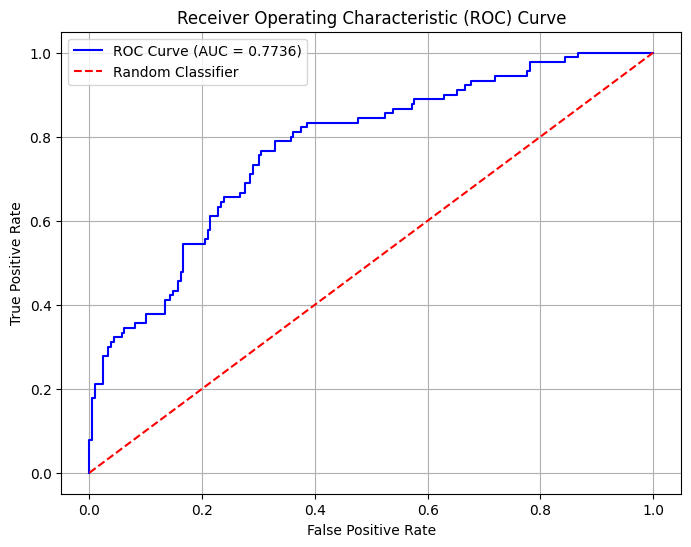


--- Model Coefficients ---
                         Feature  Coefficient
0                duration_months     0.420577
2               installment_rate     0.391540
5               existing_credits     0.267856
13          employment_years_A75     0.053529
1                  credit_amount     0.045359
15                 property_A123     0.038161
16  other_installment_plans_A143     0.000000
6                  people_liable     0.000000
12          employment_years_A73    -0.022932
18                      job_A173    -0.078680
9             credit_history_A32    -0.095162
7           checking_account_A12    -0.146582
14           personal_status_A93    -0.156334
3                residence_since    -0.159825
4                            age    -0.173528
19                telephone_A192    -0.176292
11                   purpose_A43    -0.233145
17                  housing_A152    -0.276623
10            credit_history_A34    -0.611488
8           checking_account_A14    -0.957399

Logis

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Training Logistic Regression Model ---")

# Initialize the Logistic Regression model
# Using class_weight='balanced' is another way to handle imbalance, but SMOTE was already applied.
# We will use the default settings or adjust as needed.
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # liblinear is good for small datasets and L1/L2 penalties

# Train the model using the SMOTE-resampled and scaled training data
log_reg_model.fit(X_train_resampled, y_train_resampled)

print("Model training complete.\n")

print("--- Model Evaluation ---")

# Predict on the scaled test set
y_pred = log_reg_model.predict(X_test_scaled)
y_pred_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class (1)

# 1. Classification Report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
print("Confusion Matrix on Test Data:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score on Test Data: {roc_auc:.4f}")

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Model Coefficients ---")
# Display coefficients to understand feature importance
coefficients = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Coefficient': log_reg_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)

print("\nLogistic Regression model trained and evaluated. The next step is to interpret these results and consider further model tuning or selection.")

Lets do the Threshold Tuning to this model

--- Performing Threshold Tuning ---


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

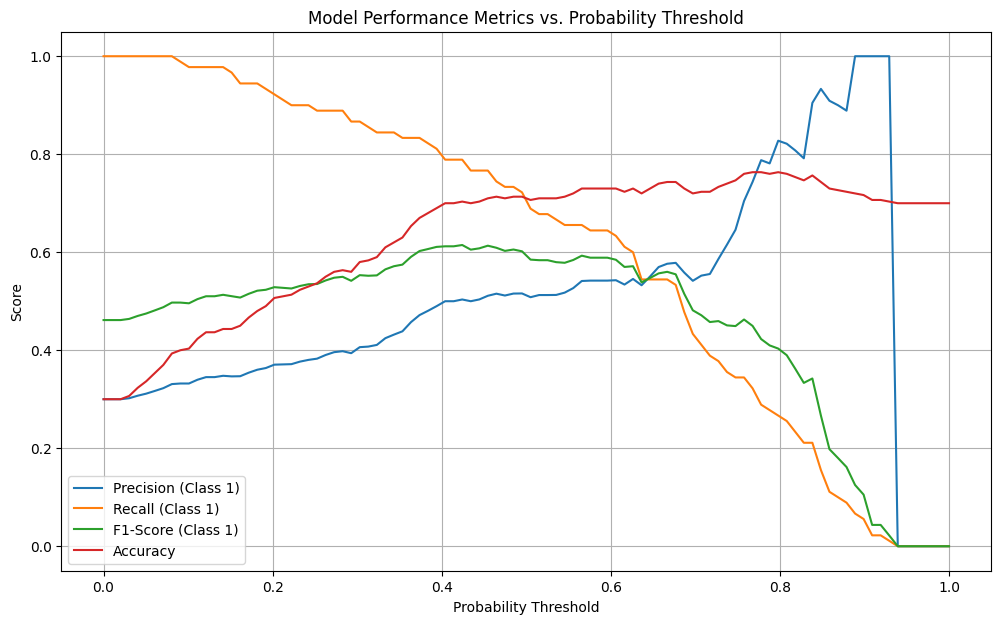


--- Interpreting Threshold Tuning ---
This plot helps in choosing a threshold that balances precision and recall based on the business objective.
For credit risk, it's often more critical to maximize recall (identify as many actual defaulters as possible) 
while maintaining an acceptable level of precision (minimizing false alarms).

Look for the point where precision and recall are optimally balanced, or where recall for class 1 is high 
while precision for class 1 is still reasonable.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

print("--- Performing Threshold Tuning ---")

# Get predicted probabilities for the positive class (default)
y_pred_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Define a range of thresholds to test
thresholds = np.linspace(0, 1, 100)

# Lists to store metrics at each threshold
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

for t in thresholds:
    y_pred_tuned = (y_pred_proba >= t).astype(int)

    # Calculate precision, recall, f1-score for the positive class (1)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_tuned, average='binary', pos_label=1)
    accuracy = accuracy_score(y_test, y_pred_tuned)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

# Plotting the metrics against thresholds
plt.figure(figsize=(12, 7))
plt.plot(thresholds, precision_scores, label='Precision (Class 1)')
plt.plot(thresholds, recall_scores, label='Recall (Class 1)')
plt.plot(thresholds, f1_scores, label='F1-Score (Class 1)')
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Model Performance Metrics vs. Probability Threshold')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Interpreting Threshold Tuning ---")
print("This plot helps in choosing a threshold that balances precision and recall based on the business objective.")
print("For credit risk, it's often more critical to maximize recall (identify as many actual defaulters as possible) ")
print("while maintaining an acceptable level of precision (minimizing false alarms).")
print("\nLook for the point where precision and recall are optimally balanced, or where recall for class 1 is high ")
print("while precision for class 1 is still reasonable.")

--- Finding and Applying the Optimal Threshold (Max F1-Score for Class 1) ---
Optimal Threshold (maximizing F1-Score for Class 1): 0.4242
Corresponding F1-Score (Class 1): 0.6147
Corresponding Precision (Class 1): 0.5035
Corresponding Recall (Class 1): 0.7889
Corresponding Accuracy: 0.7033

--- Model Evaluation with Optimal Threshold ---
Classification Report on Test Data (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       210
           1       0.50      0.79      0.61        90

    accuracy                           0.70       300
   macro avg       0.69      0.73      0.69       300
weighted avg       0.77      0.70      0.72       300

Confusion Matrix on Test Data (Optimal Threshold):


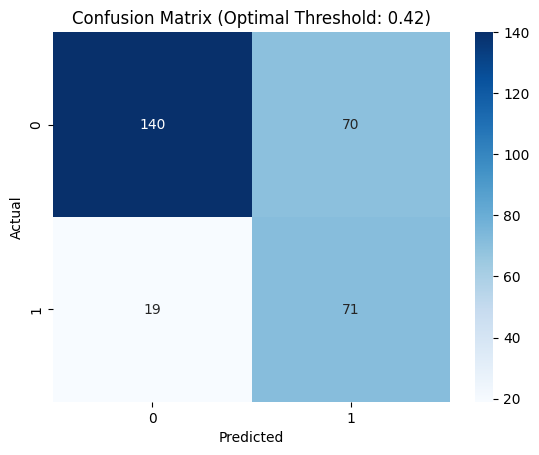


This shows how to programmatically select a threshold and evaluate the model's performance based on that choice.


In [38]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Finding and Applying the Optimal Threshold (Max F1-Score for Class 1) ---")

# Ensure metrics are defined (from previous threshold tuning cell)
# y_pred_proba, thresholds, f1_scores, precision_scores, recall_scores, accuracy_scores

# Find the threshold that maximizes the F1-score for the positive class (Class 1)
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold (maximizing F1-Score for Class 1): {optimal_threshold:.4f}")
print(f"Corresponding F1-Score (Class 1): {f1_scores[optimal_threshold_index]:.4f}")
print(f"Corresponding Precision (Class 1): {precision_scores[optimal_threshold_index]:.4f}")
print(f"Corresponding Recall (Class 1): {recall_scores[optimal_threshold_index]:.4f}")
print(f"Corresponding Accuracy: {accuracy_scores[optimal_threshold_index]:.4f}")

# Apply the optimal threshold to make predictions on the test set
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

print("\n--- Model Evaluation with Optimal Threshold ---")

# 1. Classification Report with optimal threshold
print("Classification Report on Test Data (Optimal Threshold):")
print(classification_report(y_test, y_pred_optimal))

# 2. Confusion Matrix with optimal threshold
print("Confusion Matrix on Test Data (Optimal Threshold):")
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Optimal Threshold: {optimal_threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nThis shows how to programmatically select a threshold and evaluate the model's performance based on that choice.")

Extract & Calculate Odds Ratios

In [39]:
import numpy as np
import pandas as pd

print("--- Extracting and Calculating Odds Ratios ---")

# Get coefficients and intercept from the logistic regression model
coefficients = log_reg_model.coef_[0]
intercept = log_reg_model.intercept_[0]
feature_names = X_train_resampled.columns

# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)
})

# Add the intercept to the DataFrame
intercept_df = pd.DataFrame({
    'Feature': ['Intercept'],
    'Coefficient': [intercept],
    'Odds Ratio': [np.exp(intercept)]
})

# Combine and sort by Odds Ratio
odds_ratios = pd.concat([coeff_df, intercept_df], ignore_index=True).sort_values(by='Odds Ratio', ascending=False)

print("Odds Ratios (sorted by impact on odds of default):")
print(odds_ratios.to_string())

print("\nInterpretation of Odds Ratios:")
print("- Odds Ratio > 1: An increase in this feature increases the odds of default.")
print("- Odds Ratio < 1: An increase in this feature decreases the odds of default.")
print("- Odds Ratio = 1: This feature has no effect on the odds of default.")
print("- For example, an Odds Ratio of 2.0 means the odds of default are 2 times higher (or 100% higher) for a one-unit increase in the feature.")
print("- An Odds Ratio of 0.5 means the odds of default are 0.5 times lower (or 50% lower) for a one-unit increase in the feature.")

--- Extracting and Calculating Odds Ratios ---
Odds Ratios (sorted by impact on odds of default):
                         Feature  Coefficient  Odds Ratio
0                duration_months     0.420577    1.522841
2               installment_rate     0.391540    1.479256
5               existing_credits     0.267856    1.307158
13          employment_years_A75     0.053529    1.054988
1                  credit_amount     0.045359    1.046403
15                 property_A123     0.038161    1.038899
6                  people_liable     0.000000    1.000000
16  other_installment_plans_A143     0.000000    1.000000
12          employment_years_A73    -0.022932    0.977329
18                      job_A173    -0.078680    0.924336
9             credit_history_A32    -0.095162    0.909226
7           checking_account_A12    -0.146582    0.863655
14           personal_status_A93    -0.156334    0.855274
3                residence_since    -0.159825    0.852293
4                            age

The Visualization (The "Manager's Chart")

--- Generating The 'Manager's Chart': Odds Ratios Visualization ---


/tmp/ipython-input-1971194843.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Odds Ratio', y='Feature', data=features_odds_ratios, palette='coolwarm')


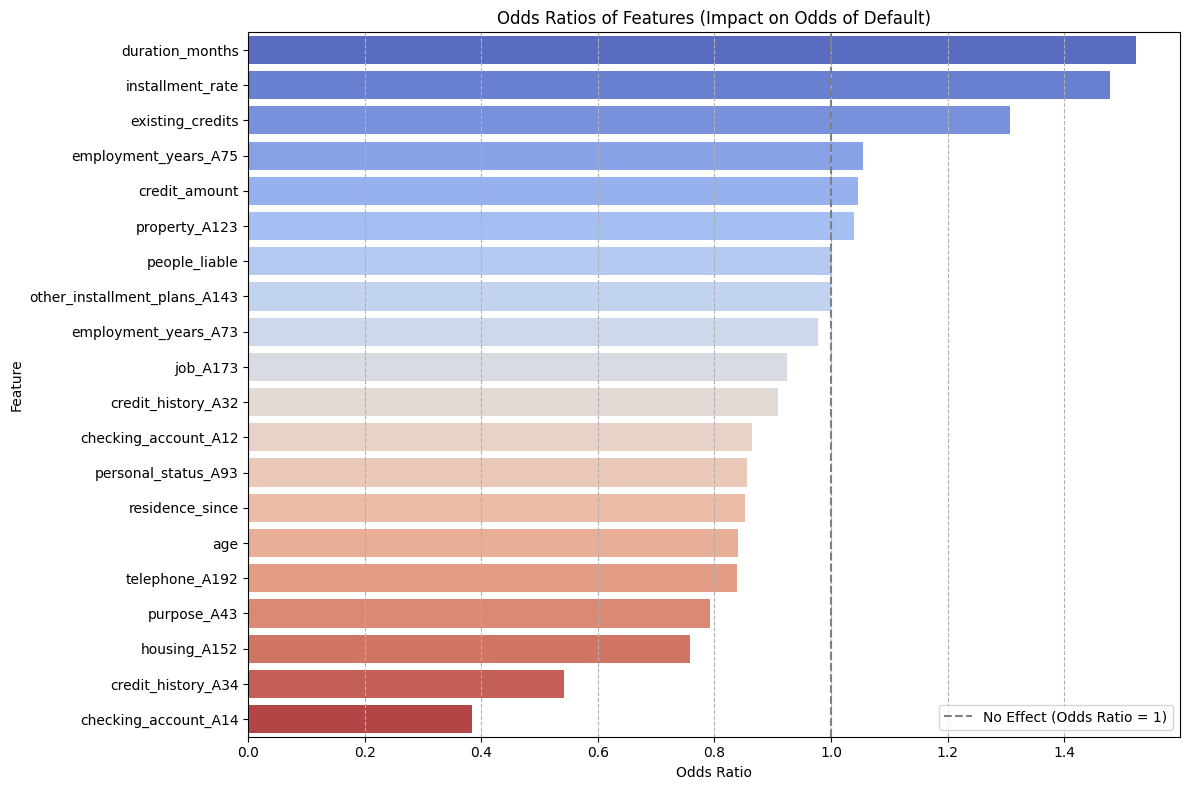


This chart visually summarizes the impact of each feature on the odds of default. Features to the right of the dashed line (Odds Ratio > 1) increase the odds of default, while features to the left (Odds Ratio < 1) decrease it.


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Generating The 'Manager's Chart': Odds Ratios Visualization ---")

# Exclude the intercept for better visualization of features
features_odds_ratios = odds_ratios[odds_ratios['Feature'] != 'Intercept']

plt.figure(figsize=(12, 8))
sns.barplot(x='Odds Ratio', y='Feature', data=features_odds_ratios, palette='coolwarm')
plt.axvline(x=1, color='grey', linestyle='--', label='No Effect (Odds Ratio = 1)')
plt.title('Odds Ratios of Features (Impact on Odds of Default)')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.legend()
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

print("\nThis chart visually summarizes the impact of each feature on the odds of default. Features to the right of the dashed line (Odds Ratio > 1) increase the odds of default, while features to the left (Odds Ratio < 1) decrease it.")